### 퍼셉트론 복습(외우기)

In [7]:
import numpy as np

w11 = np.array([-2.-2])
w12 = np.array([2,2])
w2 = np.array([1,1])

b1 = 3
b2 = -1
b3 = -1

In [8]:
def MLP(x,w,b):
    y = np.sum(w*x)+b
    if y <=0:
        return 0
    else:
        return 1

def NAND(x1, x2):
    return MLP(np.array([x1,x2]), w11, b1)

def OR(x1, x2):
    return MLP(np.array([x1,x2]), w12, b2)

def AND(x1, x2):
    return MLP(np.array([x1,x2]), w2, b3)

def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1,x2))

for x in [(0,0),(1,0),(0,1),(1,1)]:
    y = XOR(x[0],x[1])
    print(f'input:{x}, output:{y}')



input:(0, 0), output:0
input:(1, 0), output:0
input:(0, 1), output:0
input:(1, 1), output:0


### 피마 인디언 복습

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [16]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
new_df=df[['pregnant','diabetes']].groupby('pregnant', as_index=False).mean()

slope:0.043150320847676414, intercept:0.17597178714709938


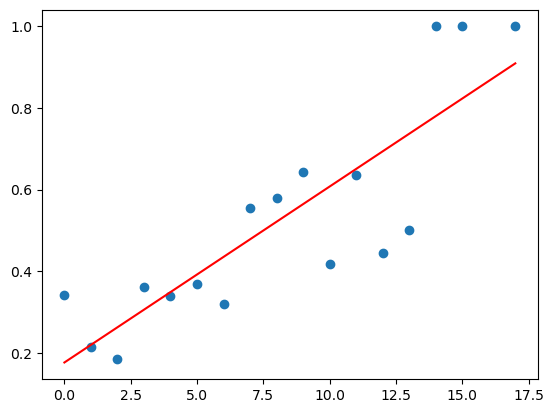

In [25]:
m, b = np.polyfit(new_df['pregnant'], new_df['diabetes'], deg=1)
fig, ax = plt.subplots()
x_fit = np.arange(18)
ax.scatter('pregnant', 'diabetes', data=new_df)
ax.plot(x_fit, m*x_fit+b,c='red')
print(f'slope:{m}, intercept:{b}')
plt.show()

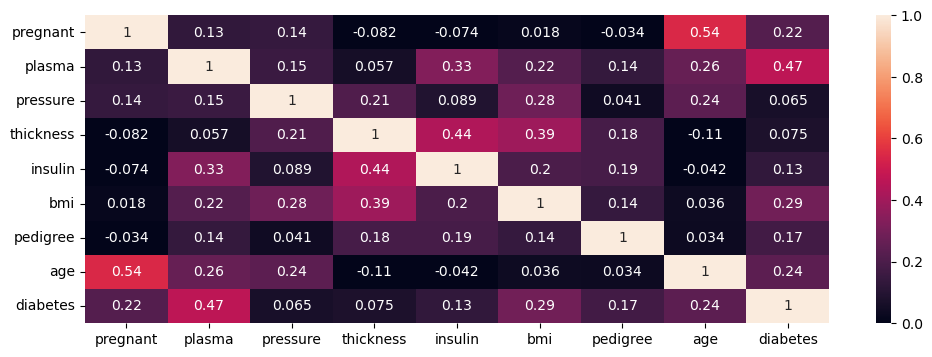

In [29]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=0) # 상관관계 알아보기 좋음
plt.show()

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(768, 8) (768,)


In [5]:
## 1. 모델 생성
model = keras.Sequential(name='Diabetes')
model.add(keras.layers.Dense(12, input_shape=(8, ), activation='relu', name='hidden'))
model.add(keras.layers.Dense(8, activation='relu', name='hidden2'))
model.add(keras.layers.Dense(1, activation='sigmoid', name='output'))
model.summary()

## 2. 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 3. 모델 피팅
model.fit(X,y,epochs=100, batch_size=100)

Model: "Diabetes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 12)                108       
                                                                 
 hidden2 (Dense)             (None, 8)                 104       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 1s 5ms/step - loss: 21.4402 - accuracy: 0.3490
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 18.6893 - accuracy: 0.3490
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 16.3003 - accuracy: 0.3490
Epoch 4/100
8/8 [=============

In [6]:
iris_df=pd.read_csv('./data/iris3.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]
print(X.shape, y.shape)

(150, 4) (150,)


<Figure size 1000x1000 with 0 Axes>

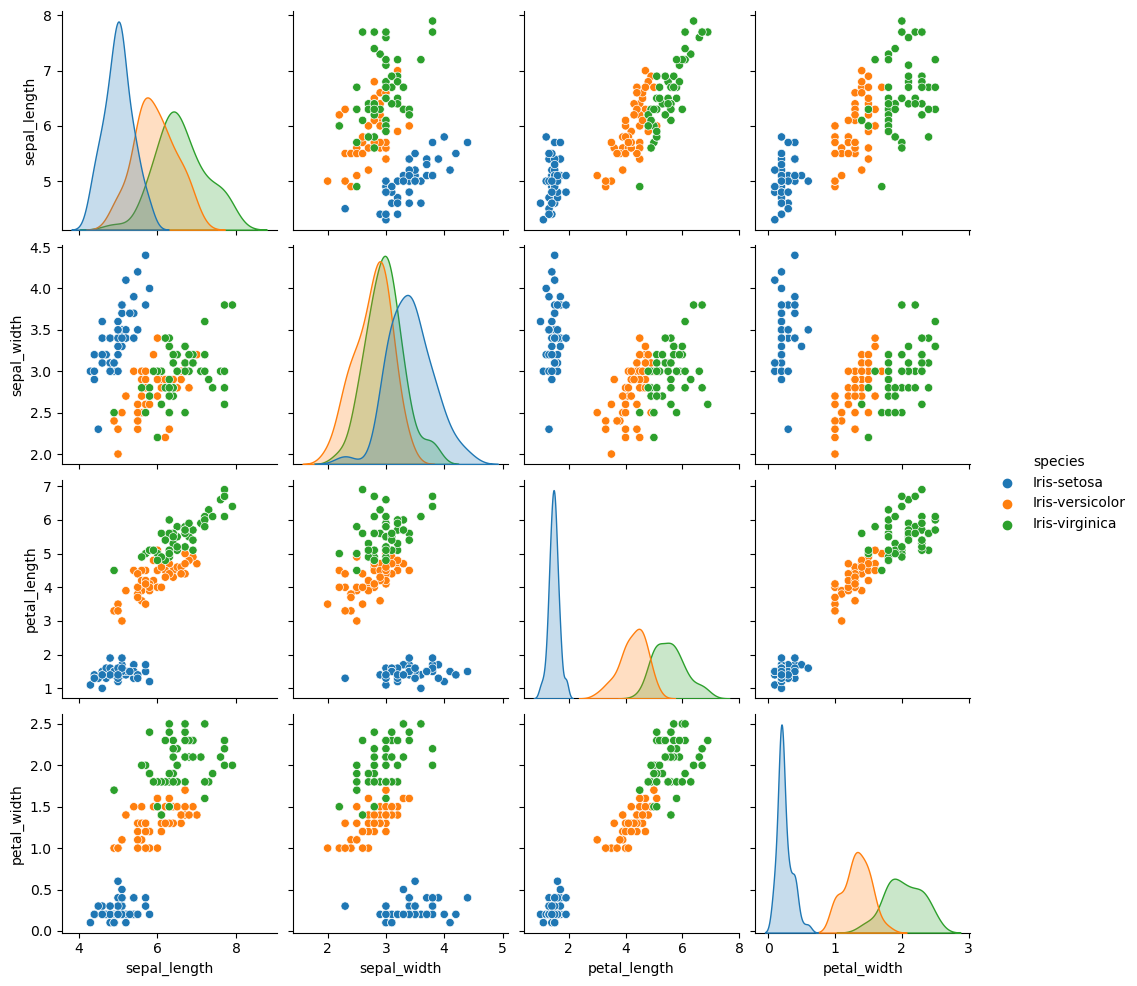

In [11]:
plt.figure(figsize=(10,10))
sns.pairplot(iris_df, hue='species')
plt.show()

In [16]:
## 결과가 문자열로 나올 때 숫자로 변환하는 방법
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_label = label_encoder.transform(y)
# print(y_label)

### one-hot encoding
y_onehot = keras.utils.to_categorical(y_label)
print(y_onehot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [18]:
## 1. 모델 생성
model = keras.Sequential(name='multi_class')
model.add(keras.layers.Dense(16, input_shape=(4, ), activation='relu', name='hidden'))
model.add(keras.layers.Dense(3, activation='softmax', name='output'))
model.summary()

## 2. 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
## sparse_categorical_crossentropy로 넣어줄 시 one-hot encoding 안해도 됨

## 3. 모델 학습(피팅)
model.fit(X, y_onehot, epochs=100, batch_size=30)

Model: "multi_class"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 16)                80        
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.9834 - accuracy: 0.4467
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8807 - accuracy: 0.6467
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7948 - accuracy: 0.6667
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7506 - accuracy: 0.6733
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - 

### 데이터의 확인과 예측 실행

In [20]:
df = pd.read_csv('./data/sonar3.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.shape, y.shape)

(208, 60) (208,)


In [30]:
## 1. 모델 생성
model = keras.Sequential(name='sonar')
model.add(keras.layers.Dense(24, input_shape=(60, ), activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

## 2. 모델 컴파일 (loss, optimizer, metrics)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 3. 모델 학습(fit)
model.fit(X,y, epochs=200, batch_size=10)

Model: "sonar"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                1464      
                                                                 
 dense_13 (Dense)            (None, 10)                250       
                                                                 
 dense_14 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
21/21 [==============================] - 1s 1ms/step - loss: 0.6857 - accuracy: 0.5433
Epoch 2/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.5817
Epoch 3/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.5625
Epoch 4/200
21/21 [=======

In [31]:
print(f'loss:{model.evaluate(X, y)[0]}, accuracy:{model.evaluate(X, y)[1]}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0576 - accuracy: 0.9952
loss:0.05764252319931984, accuracy:0.995192289352417


In [32]:
## training, validation set split
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(145, 60) (145,)
(63, 60) (63,)


In [57]:
## 1. 모델 생성
model = keras.Sequential(name='sonar_test')
model.add(keras.layers.Dense(24, input_shape=(60, ), activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

## 2. 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 3. 모델 핏
model.fit(X_train, y_train, epochs=200, batch_size=10)

Model: "sonar_test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 24)                1464      
                                                                 
 dense_25 (Dense)            (None, 10)                250       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,725
Trainable params: 1,725
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.5310
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5448
Epoch 3/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5655
Epoch 4/200
15/15 [==

In [58]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7937


[0.48900657892227173, 0.7936508059501648]

In [59]:
## 5. 모델 저장
model.save('sonar_model.hdf5')

In [60]:
## 6. 모델 로딩
model_imported = keras.models.load_model('./sonar_model.hdf5')

In [61]:
## 7. 로딩한 모델 사용방법
model_imported.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.4890 - accuracy: 0.7937


[0.48900657892227173, 0.7936508059501648]

### K-fold 교차 검증

In [63]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True) # 5개로 나눈다
acc_score = []

def model_fn():
    model = keras.Sequential()
    model.add(keras.layers.Dense(24, input_shape=(60, ), activation='relu'))
    model.add(keras.layers.Dense(10, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    return model

for train_index, test_index in kfold.split(X):
    X_train, X_test - X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test - y.iloc[train_index], y.iloc[test_index]

    model = model_fn()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 

    accuracy = model.evaluate(X_test, y_test)[1]
    acc_score.append(accuracy)

avg_acc_score = sum(acc_score) / 5

print(f'정확도:{acc_score}')
print(f'정확도 평균:{avg_acc_score}')

2/2 [==============================] - 0s 3ms/step - loss: 0.9236 - accuracy: 0.8095
정확도:[0.8571428656578064, 0.841269850730896, 0.841269850730896, 0.8095238208770752, 0.8095238208770752]
정확도 평균:0.8317460417747498


In [72]:
del model

### 와인 셋

In [64]:
df = pd.read_csv('./data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [66]:
df.shape

(6497, 13)

In [67]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(6497, 12) (6497,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4547, 12) (4547,)
(1950, 12) (1950,)


In [164]:
model = keras.Sequential(name='wine')
model.add(keras.layers.Dense(30, input_shape=(12, ), activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "wine"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 30)                390       
                                                                 
 dense_105 (Dense)           (None, 12)                372       
                                                                 
 dense_106 (Dense)           (None, 8)                 104       
                                                                 
 dense_107 (Dense)           (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=200, batch_size=200)

### 모델 저장

In [88]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR) # 폴더 생성

### 학습의 자동 중단

In [165]:
# modelpath = './model/{epoch:2d}-{val_loss:.4f}.hdf5'
modelpath = './model/best_model.hdf5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, verbose=1)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # 10정도 좋아지지 않으면 stop

history = model.fit(X,y,validation_split=0.3, epochs=2000, batch_size=500, callbacks=[checkpoint, earlystop])

Epoch 1/2000
 1/10 [==>...........................] - ETA: 4s - loss: 13.0813 - accuracy: 0.3720
Epoch 1: val_loss improved from inf to 12.65678, saving model to ./model\best_model.hdf5
10/10 [==============================] - 1s 32ms/step - loss: 11.7928 - accuracy: 0.3517 - val_loss: 12.6568 - val_accuracy: 0.0000e+00
Epoch 2/2000
 1/10 [==>...........................] - ETA: 0s - loss: 9.0341 - accuracy: 0.3620
Epoch 2: val_loss improved from 12.65678 to 7.33813, saving model to ./model\best_model.hdf5
10/10 [==============================] - 0s 9ms/step - loss: 7.5720 - accuracy: 0.3517 - val_loss: 7.3381 - val_accuracy: 0.0000e+00
Epoch 3/2000
 1/10 [==>...........................] - ETA: 0s - loss: 5.5617 - accuracy: 0.3340
Epoch 3: val_loss improved from 7.33813 to 3.38206, saving model to ./model\best_model.hdf5
10/10 [==============================] - 0s 10ms/step - loss: 4.0787 - accuracy: 0.3517 - val_loss: 3.3821 - val_accuracy: 0.0000e+00
Epoch 4/2000
 1/10 [==>...........

In [163]:
del model

### 과적합 확인

In [121]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

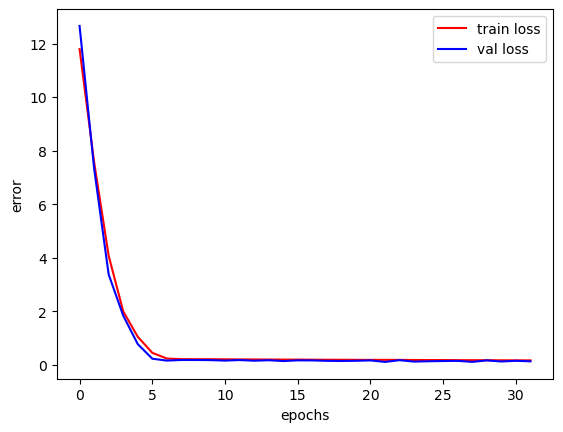

In [166]:
# import numpy as np
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# x_len = np.arange(len(val_loss))

fig, ax = plt.subplots()
ax.plot(train_loss, c='red', label='train loss')
ax.plot(val_loss, c='blue', label='val loss')
ax.set_xlabel('epochs')
ax.set_ylabel('error')
plt.legend()
plt.show()

## 실제 데이터로 만들어보는 모델(집값)

In [179]:
df = pd.read_csv('./data/house_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 결측치, 카테고리 변수 처리

In [192]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [198]:
df_copy = df.copy()

In [199]:
## 삭제
df_copy.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [184]:
df_copy.shape

(1460, 76)

In [200]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [201]:
## int 처리
df_int_mean = df_copy.select_dtypes(['int64', 'float64']).mean()
fill_names = df_copy.select_dtypes(['int64', 'float64']).columns
df_copy[fill_names] = df_copy.select_dtypes(['int64', 'float64']).fillna(df_int_mean)

In [202]:
df_copy.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
Electrical       1
FullBath         0
BsmtHalfBath     0
TotRmsAbvGrd     0
BsmtFullBath     0
HalfBath         0
GrLivArea        0
LowQualFinSF     0
BedroomAbvGr     0
KitchenAbvGr     0
dtype: int64

In [206]:
fill_obj = df_copy.select_dtypes(['object']).mode()
fill_obj_names = df_copy.select_dtypes(['object']).columns
df_copy[fill_obj_names] = df_copy.select_dtypes(['object']).fillna(fill_obj)

In [207]:
df_copy.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
Electrical       1
FullBath         0
BsmtHalfBath     0
TotRmsAbvGrd     0
BsmtFullBath     0
HalfBath         0
GrLivArea        0
LowQualFinSF     0
BedroomAbvGr     0
KitchenAbvGr     0
dtype: int64

In [212]:
df_copy['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [215]:
df_copy['GarageType'].isnull().sum()

81

In [217]:
df_copy.dropna(axis=0,inplace=True) # 걍 null값 삭제

In [219]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1338 non-null   int64  
 1   MSSubClass     1338 non-null   int64  
 2   MSZoning       1338 non-null   object 
 3   LotFrontage    1338 non-null   float64
 4   LotArea        1338 non-null   int64  
 5   Street         1338 non-null   object 
 6   LotShape       1338 non-null   object 
 7   LandContour    1338 non-null   object 
 8   Utilities      1338 non-null   object 
 9   LotConfig      1338 non-null   object 
 10  LandSlope      1338 non-null   object 
 11  Neighborhood   1338 non-null   object 
 12  Condition1     1338 non-null   object 
 13  Condition2     1338 non-null   object 
 14  BldgType       1338 non-null   object 
 15  HouseStyle     1338 non-null   object 
 16  OverallQual    1338 non-null   int64  
 17  OverallCond    1338 non-null   int64  
 18  YearBuil

In [222]:
df_copy = pd.get_dummies(df_copy) # 0과 1로 이루어진 변수로 변경 (one-hot 인코딩)
df_copy.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [223]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Columns: 267 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(229)
memory usage: 706.9 KB


In [227]:
df_copy_corr = df_copy.select_dtypes(['int64','float64']).corr()
df_copy_corr_sorted = df_copy_corr.sort_values(by='SalePrice', ascending=False)

In [233]:
corr_index = df_copy_corr_sorted.head(6).index

In [238]:
df_copy[corr_index].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF
SalePrice,1.000000,0.783546,0.711706,0.640154,0.607535,0.604714
OverallQual,0.783546,1.000000,0.594470,0.591878,0.530092,0.481978
GrLivArea,0.711706,0.594470,1.000000,0.483943,0.477868,0.554846
GarageCars,0.640154,0.591878,0.483943,1.000000,0.832166,0.440237
GarageArea,0.607535,0.530092,0.477868,0.832166,1.000000,0.500071
1stFlrSF,0.604714,0.481978,0.554846,0.440237,0.500071,1.000000


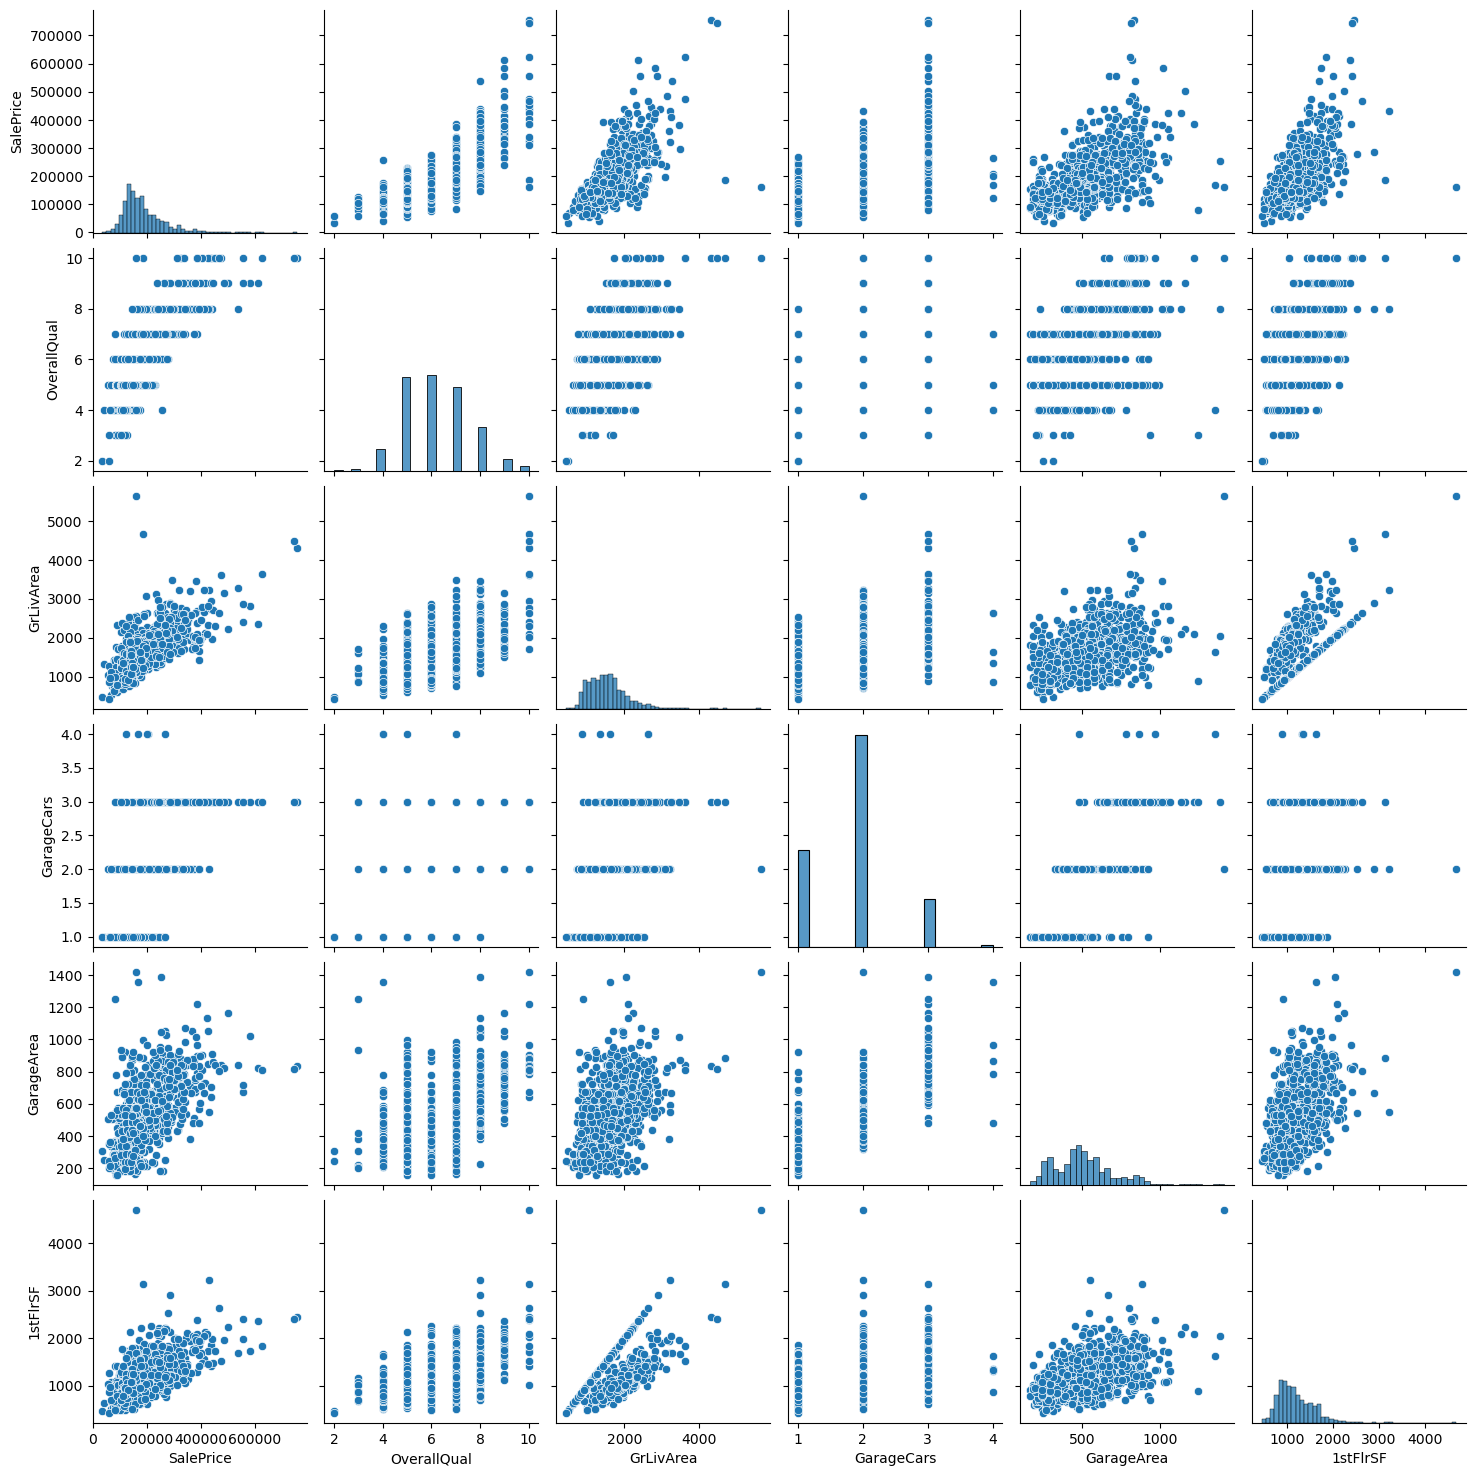

In [240]:
sns.pairplot(df_copy[corr_index])
plt.show()

In [279]:
cols_train = ['OverallQual','GrLivArea','GarageCars','GarageArea','1stFlrSF']
X_train_pre = df_copy[cols_train]
y = df_copy['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [280]:
X_train_pre.shape

(1338, 5)

In [278]:
X_train_pre.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF
0,208500,7,1710,2,548,856
1,181500,6,1262,2,460,1262
2,223500,7,1786,2,608,920
3,140000,7,1717,3,642,961
4,250000,8,2198,3,836,1145


In [290]:
del model

In [291]:
model = keras.Sequential(name='house')
model.add(keras.layers.Dense(10, input_shape=(5, ), activation='relu'))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(1, ))
model.summary()

Model: "house"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_158 (Dense)           (None, 10)                60        
                                                                 
 dense_159 (Dense)           (None, 30)                330       
                                                                 
 dense_160 (Dense)           (None, 40)                1240      
                                                                 
 dense_161 (Dense)           (None, 1)                 41        
                                                                 
Total params: 1,671
Trainable params: 1,671
Non-trainable params: 0
_________________________________________________________________


In [292]:
model.compile(loss='mean_squared_error', optimizer='adam') # 선형 회귀이므로 평균 제곱 오차

In [293]:
modelpath = './model/best_model_house.hdf5'

checkpoint = keras.callbacks.ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_best_only=True, verbose=1)

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # 10정도 좋아지지 않으면 stop

history = model.fit(X_train,y_train,validation_split=0.3, epochs=2000, batch_size=32, callbacks=[checkpoint, earlystop])

Epoch 1/2000
 1/24 [>.............................] - ETA: 9s - loss: 35651334144.0000
Epoch 1: val_loss improved from inf to 41282220032.00000, saving model to ./model\best_model_house.hdf5
24/24 [==============================] - 1s 12ms/step - loss: 39904305152.0000 - val_loss: 41282220032.0000
Epoch 2/2000
 1/24 [>.............................] - ETA: 0s - loss: 42974896128.0000
Epoch 2: val_loss improved from 41282220032.00000 to 40992464896.00000, saving model to ./model\best_model_house.hdf5
24/24 [==============================] - 0s 4ms/step - loss: 39680000000.0000 - val_loss: 40992464896.0000
Epoch 3/2000
 1/24 [>.............................] - ETA: 0s - loss: 32380686336.0000
Epoch 3: val_loss improved from 40992464896.00000 to 40417263616.00000, saving model to ./model\best_model_house.hdf5
24/24 [==============================] - 0s 4ms/step - loss: 39295270912.0000 - val_loss: 40417263616.0000
Epoch 4/2000
 1/24 [>.............................] - ETA: 0s - loss: 3367809

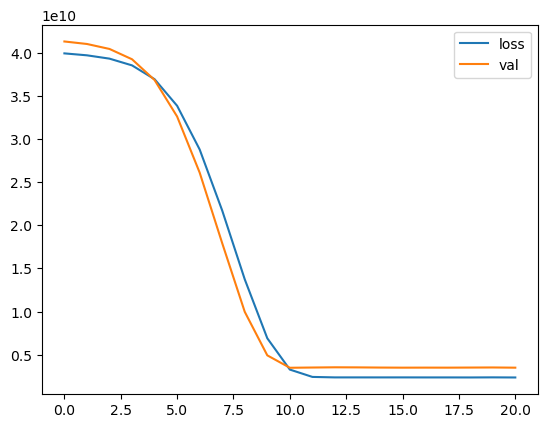

In [294]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [295]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 2189895680.0000


2189895680.0

In [285]:
real_prices = []
pred_prices = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.2f}, 예상가격: {:.2f}".format(real, prediction))
    real_prices.append(real)
    pred_prices.append(prediction)
    n_iter = n_iter + 1
    X_num.append(n_iter)

9/9 [==============================] - 0s 1ms/step
실제가격: 176000.00, 예상가격: 158883.66
실제가격: 154300.00, 예상가격: 229234.75
실제가격: 260400.00, 예상가격: 237749.09
실제가격: 135500.00, 예상가격: 137429.86
실제가격: 215000.00, 예상가격: 229352.02
실제가격: 136900.00, 예상가격: 207028.77
실제가격: 146500.00, 예상가격: 171059.73
실제가격: 244000.00, 예상가격: 207762.98
실제가격: 180000.00, 예상가격: 179600.52
실제가격: 153575.00, 예상가격: 144232.52
실제가격: 141500.00, 예상가격: 182822.55
실제가격: 140000.00, 예상가격: 157640.00
실제가격: 133500.00, 예상가격: 121183.29
실제가격: 87000.00, 예상가격: 113747.38
실제가격: 124000.00, 예상가격: 126248.14
실제가격: 119500.00, 예상가격: 131117.47
실제가격: 120500.00, 예상가격: 125548.49
실제가격: 264561.00, 예상가격: 220570.75
실제가격: 145000.00, 예상가격: 152759.31
실제가격: 129900.00, 예상가격: 192059.17
실제가격: 157900.00, 예상가격: 196073.52
실제가격: 174900.00, 예상가격: 164175.33
실제가격: 130500.00, 예상가격: 153408.98
실제가격: 155000.00, 예상가격: 166251.86
실제가격: 249700.00, 예상가격: 236306.14
